In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [7]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [24]:
df=pd.DataFrame(data,columns=["Values"])
df

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
99,47.654129
100,10.000000
101,110.000000
102,5.000000


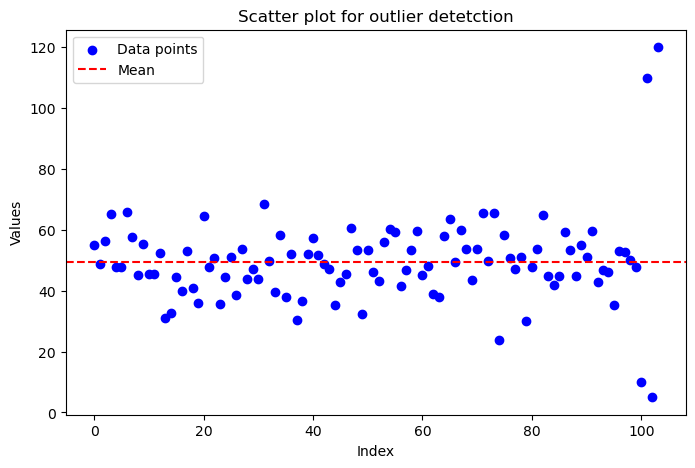

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outlier detetction")
plt.legend()
plt.show()

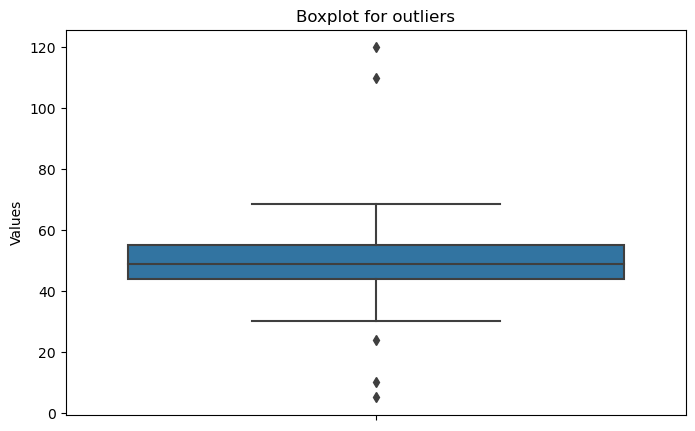

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Boxplot for outliers")
plt.show()

**Z-Score Method**

the Z-score formula is:

z=x-M/sd

where:

x=data point

m=mean of the dataset

sd=standard deviation of the dataset

steps:

1.Compute the Z-score for each data point

2.if Z-score > 3 or Z-score <-3, mark it as an outlies.

In [16]:
df['Z-score'] = zscore(df['Values'])
df['outlier_z'] = df['Z-score'].apply(lambda x: "outlier" if abs(x) > 3 else 'Normal')
print(df[df['outlier_z'] == "outlier"])

     Values   Z-score outlier_z
101   110.0  4.328173   outlier
102     5.0 -3.175368   outlier
103   120.0  5.042796   outlier


**Interquartile Range(IQR) MethodThe IQR formula is:**

IQR = Q3 - Q1.

steps:

1.Calculate Q1(25th percentile) and Q3(75th percentile).

2.Compute IQR = Q3 - Q1.

3.Define lower & upper bounds:

  **Lower bound=Q1-1.5xIQR**

  **Upper bound=Q3+1.5xIQR**

4.Any value outside these bounds is an outlier.

In [19]:
q1=df['Values'].quantile(0.25)
q3=df['Values'].quantile(0.75)
iqr=q3-q1
lowrbound=q1-1.5*iqr
upperbound=q3+1.5*iqr
df['outliers_iqr']=df['Values'].apply(lambda x:'outlier' if (x < lowrbound or x>upperbound) else 'normal')
print(df[df['outliers_iqr']=='outlier'])


         Values   Z-score outlier_z outliers_iqr
74    23.802549 -1.831694    Normal      outlier
100   10.000000 -2.818056    Normal      outlier
101  110.000000  4.328173   outlier      outlier
102    5.000000 -3.175368   outlier      outlier
103  120.000000  5.042796   outlier      outlier


summary 

1 scatterplot-outliers appear far from the cluster

2. Box Plot-Outliers are outside the whiskers.

3.Z-Score Values with Z > 3 or Z-3 are outliers.

4.IQR Method - Values outside [Q1-1.5xIQR, Q3+ 1.5xIQR) are outliers.

Finding Outliers Using the IQR Method with a 5-Number Summary The 5-number summary consists of

Minimum (Q0) The smallest value in the dataset.

First Quartile (Q1) - The 25th percentile (lower quartile).

Median (Q2)- The 50th percentile (middle value).

Third Quartile (Q3) The 75th percentile (upper quartile).

Maximum (Q4) The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:

IQR-Q3-Q1

Any value outside the range:

[Q1-1.5xIQR,Q3+1.5xIQR] is considered an outlier.